# Model Development for Multilingual Stance Detection

This notebook implements and evaluates our stance detection models.

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import os

In [2]:
# Load processed data
processed_data = joblib.load('../data/processed/processed_data.joblib')

X_train, y_train = processed_data['train']
X_val, y_val = processed_data['val']
X_test, y_test = processed_data['test']

print("Data loaded successfully!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Data loaded successfully!
Training samples: 5655
Validation samples: 1212
Test samples: 1212


In [3]:
# Create ensemble model with SMOTE
def create_model():
    # Base classifiers
    nb = MultinomialNB(alpha=0.1)
    lr = LogisticRegression(C=1.0, max_iter=300, class_weight='balanced')
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced')
    
    # Create voting classifier
    ensemble = VotingClassifier([
        ('nb', nb),
        ('lr', lr),
        ('rf', rf)
    ], voting='soft')
    
    # Create pipeline with SMOTE
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', ensemble)
    ])
    
    return pipeline

# Create and train model
print("Training model...")
model = create_model()
model.fit(X_train, y_train)

Training model...


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 VotingClassifier(estimators=[('nb', MultinomialNB(alpha=0.1)),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=300)),
                                              ('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      max_depth=10))],
                                  voting='soft'))])


Results for Validation Set:

Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.16      0.26        31
           0       0.91      0.93      0.92      1019
           1       0.54      0.53      0.54       162

    accuracy                           0.86      1212
   macro avg       0.72      0.54      0.57      1212
weighted avg       0.86      0.86      0.85      1212



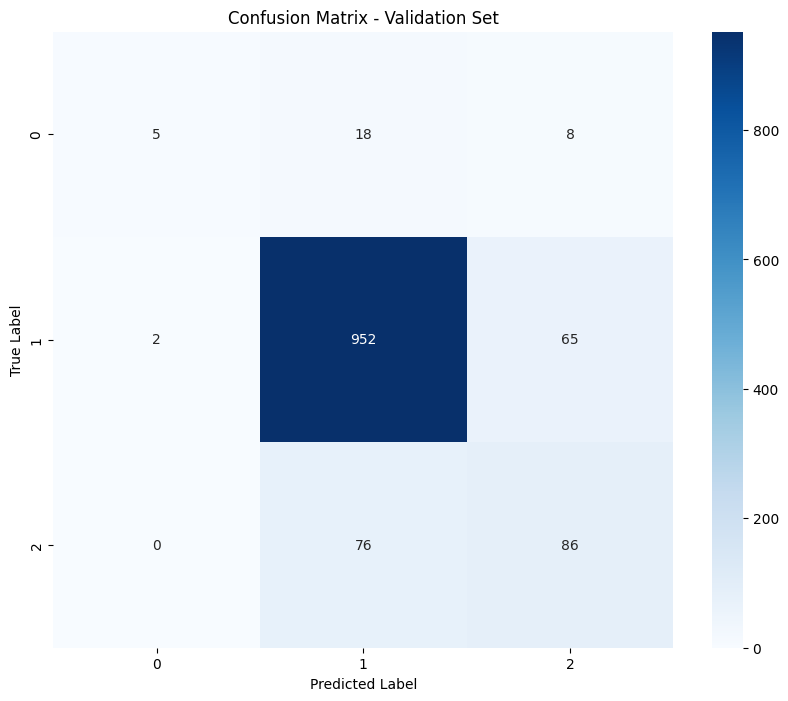


Results for Test Set:

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.19      0.29        32
           0       0.91      0.95      0.93      1018
           1       0.59      0.54      0.57       162

    accuracy                           0.87      1212
   macro avg       0.72      0.56      0.60      1212
weighted avg       0.86      0.87      0.86      1212



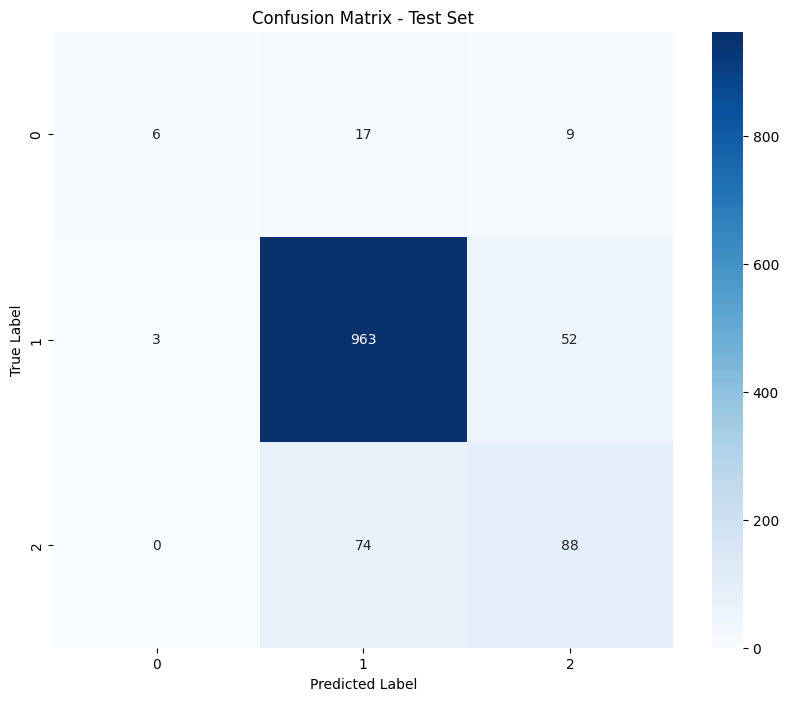

In [4]:
# Evaluate model
def evaluate_model(model, X, y, set_name=""):
    predictions = model.predict(X)
    
    print(f"\nResults for {set_name}:")
    print("\nClassification Report:")
    print(classification_report(y, predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return predictions

# Evaluate on validation set
val_predictions = evaluate_model(model, X_val, y_val, "Validation Set")

# Evaluate on test set
test_predictions = evaluate_model(model, X_test, y_test, "Test Set")

In [5]:
# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save the model
print("Saving model...")
joblib.dump(model, '../data/processed/stance_classifier.joblib')
print("Model saved successfully!")

Saving model...
Model saved successfully!
